<a href="https://colab.research.google.com/github/VbsmRobotic/DL_ImageClassifier/blob/main/DeepLearning_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from tensorflow import keras
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Flatten
# from keras.constraints import max_norm
# from keras.optimizers import SGD

In [30]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()  # x is image and y is label

In [31]:
x_train.shape     # Number of Images, size ,RGB

(50000, 32, 32, 3)

In [32]:
y_train.shape     # Number of images and label

(50000, 1)

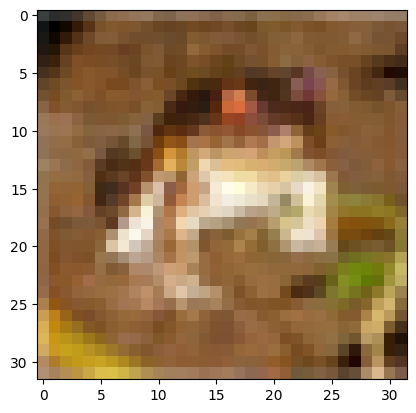

In [33]:
plt.imshow(x_train[0])

In [34]:
y_train[0]    # 0 airplane 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck

array([6], dtype=uint8)

In [35]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255. If the number between 0-1 faster be trained.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [36]:
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [38]:
class_num = y_train.shape[1]   # 10 class
class_num

10

In [39]:
x_train.shape[1:]

(32, 32, 3)

#**Building the Model**

In [46]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))  #Avoid Overfitting by offing the nerouns 20%
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# After applying multiple max pooling layers, we should flatten the output before passing it to the fully connected layers in a sequential neural network
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))    # Avoid Overfitting OFF Neruons
model.add(BatchNormalization())

model.add(Dense(class_num, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


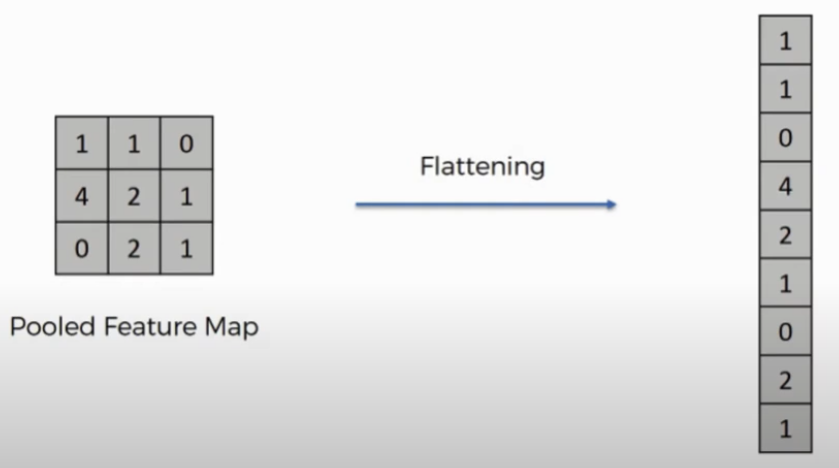

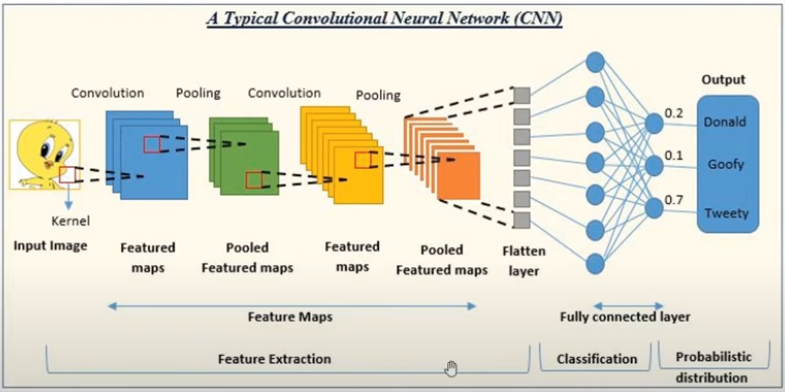

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   # if two class binary_cross

Categorical Cross-Entropy (CCE), also known as softmax loss or log loss, is one of the most commonly used loss functions in machine learning, particularly for classification problems. It measures the difference between the predicted probability distribution and the actual (true) distribution of classes. The function helps a machine learning model determine how far its predictions are from the true labels and guides it in learning to make more accurate predictions.
Mathematical Representation of Categorical Cross-Entropy
The categorical cross-entropy formula is expressed as:

L(y,y^) = -Sigma yi log(yi^)  
 Where:

L(y, y^): is the categorical cross-entropy loss.
yi : is the true label (0 or 1 for each class) from the one-hot encoded target vector.
y^ : is the predicted probability for class
C is the number of classes.
In this formula, the logarithm ensures that incorrect predictions are heavily penalized.


In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 198,794 (776.54 KB)

 Trainable params: 197,962 (773.29 KB)

 Non-trainable params: 832 (3.25 KB)

###Trainging the model

In [52]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.2873 - loss: 2.0621 - val_accuracy: 0.4075 - val_loss: 1.6609
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4820 - loss: 1.4238 - val_accuracy: 0.4548 - val_loss: 1.5333
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5637 - loss: 1.2173 - val_accuracy: 0.5995 - val_loss: 1.0921
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6095 - loss: 1.0987 - val_accuracy: 0.6227 - val_loss: 1.0771
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6415 - loss: 1.0194 - val_accuracy: 0.6592 - val_loss: 0.9485
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6678 - loss: 0.9532 - val_accuracy: 0.6739 - val_loss: 0.9289
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6857 - loss: 0.9077 - val_accuracy: 0.7319 - val_loss: 0.7744
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6932 - loss: 0.8843 - val_accuracy: 

In [59]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


In [61]:
import pandas as pd

<Axes: >

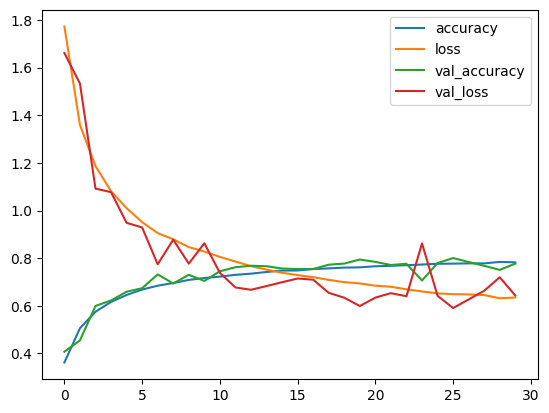

In [60]:
pd.DataFrame(history.history).plot()

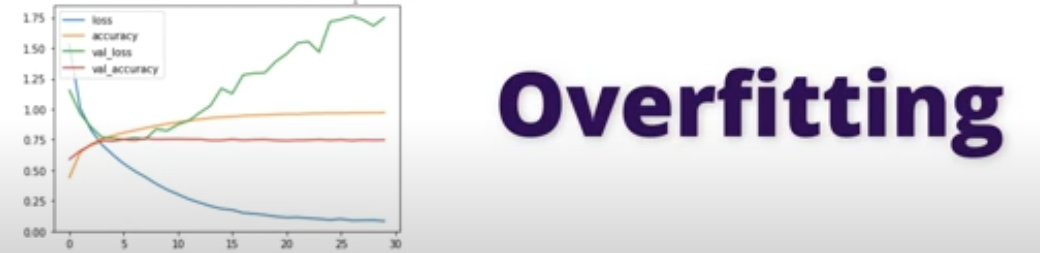

(0.5, 1.0)

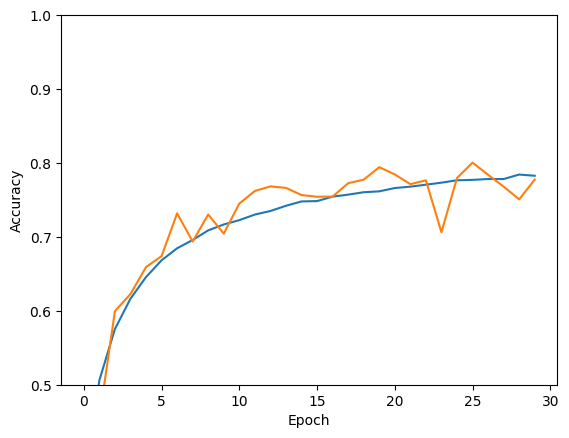

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
model2.predict(x_test[0:10])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([2.6235593e-04, 8.8152796e-05, 9.1197035e-05, 8.7164766e-01,
       2.5593883e-05, 1.2647167e-01, 1.0939554e-03, 2.5681037e-04,
       4.9578473e-05, 1.2964301e-05], dtype=float32)

In [ ]:
labels[3]

'cat'

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

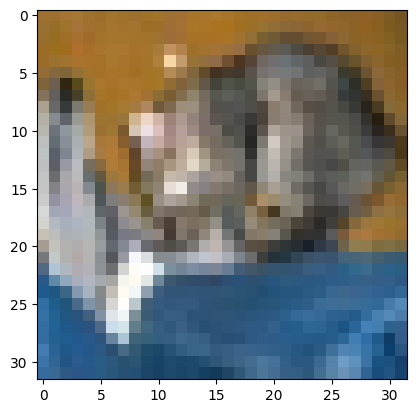

In [ ]:
plt.imshow(x_test[0])

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


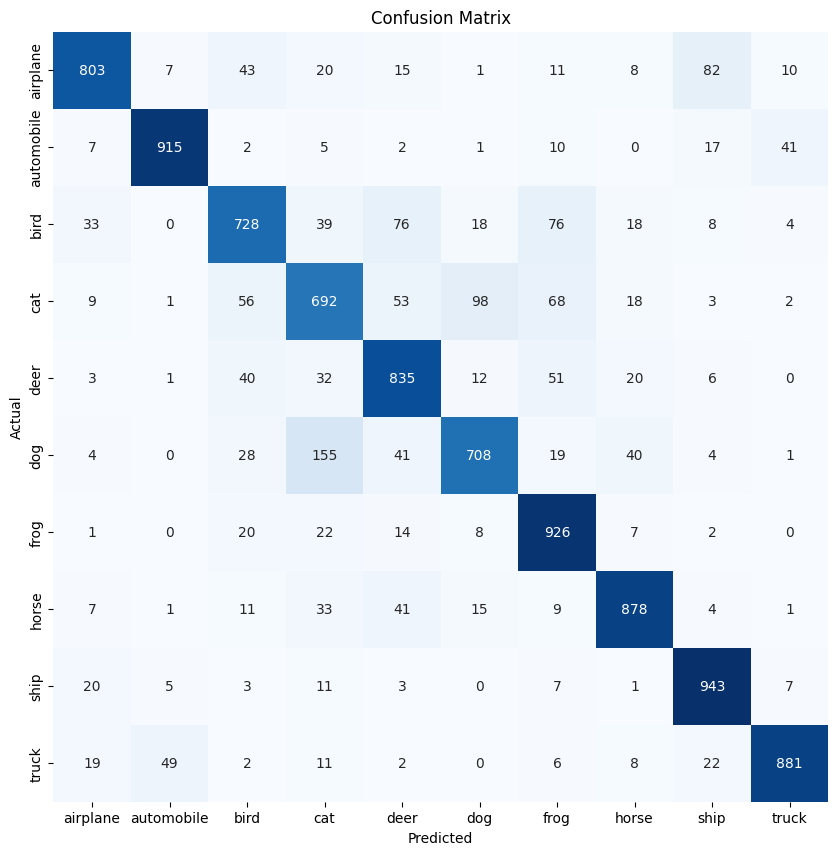

In [ ]:
# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)

# Import confusion_matrix and seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test from one-hot encoded back to single labels
y_test_labels = np.argmax(y_test, axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test_labels, predictions)

# Plotting confusion matrix
plt.figure(figsize=(10, 10))
# Corrected the keyword arguments to xticklabels and yticklabels
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization

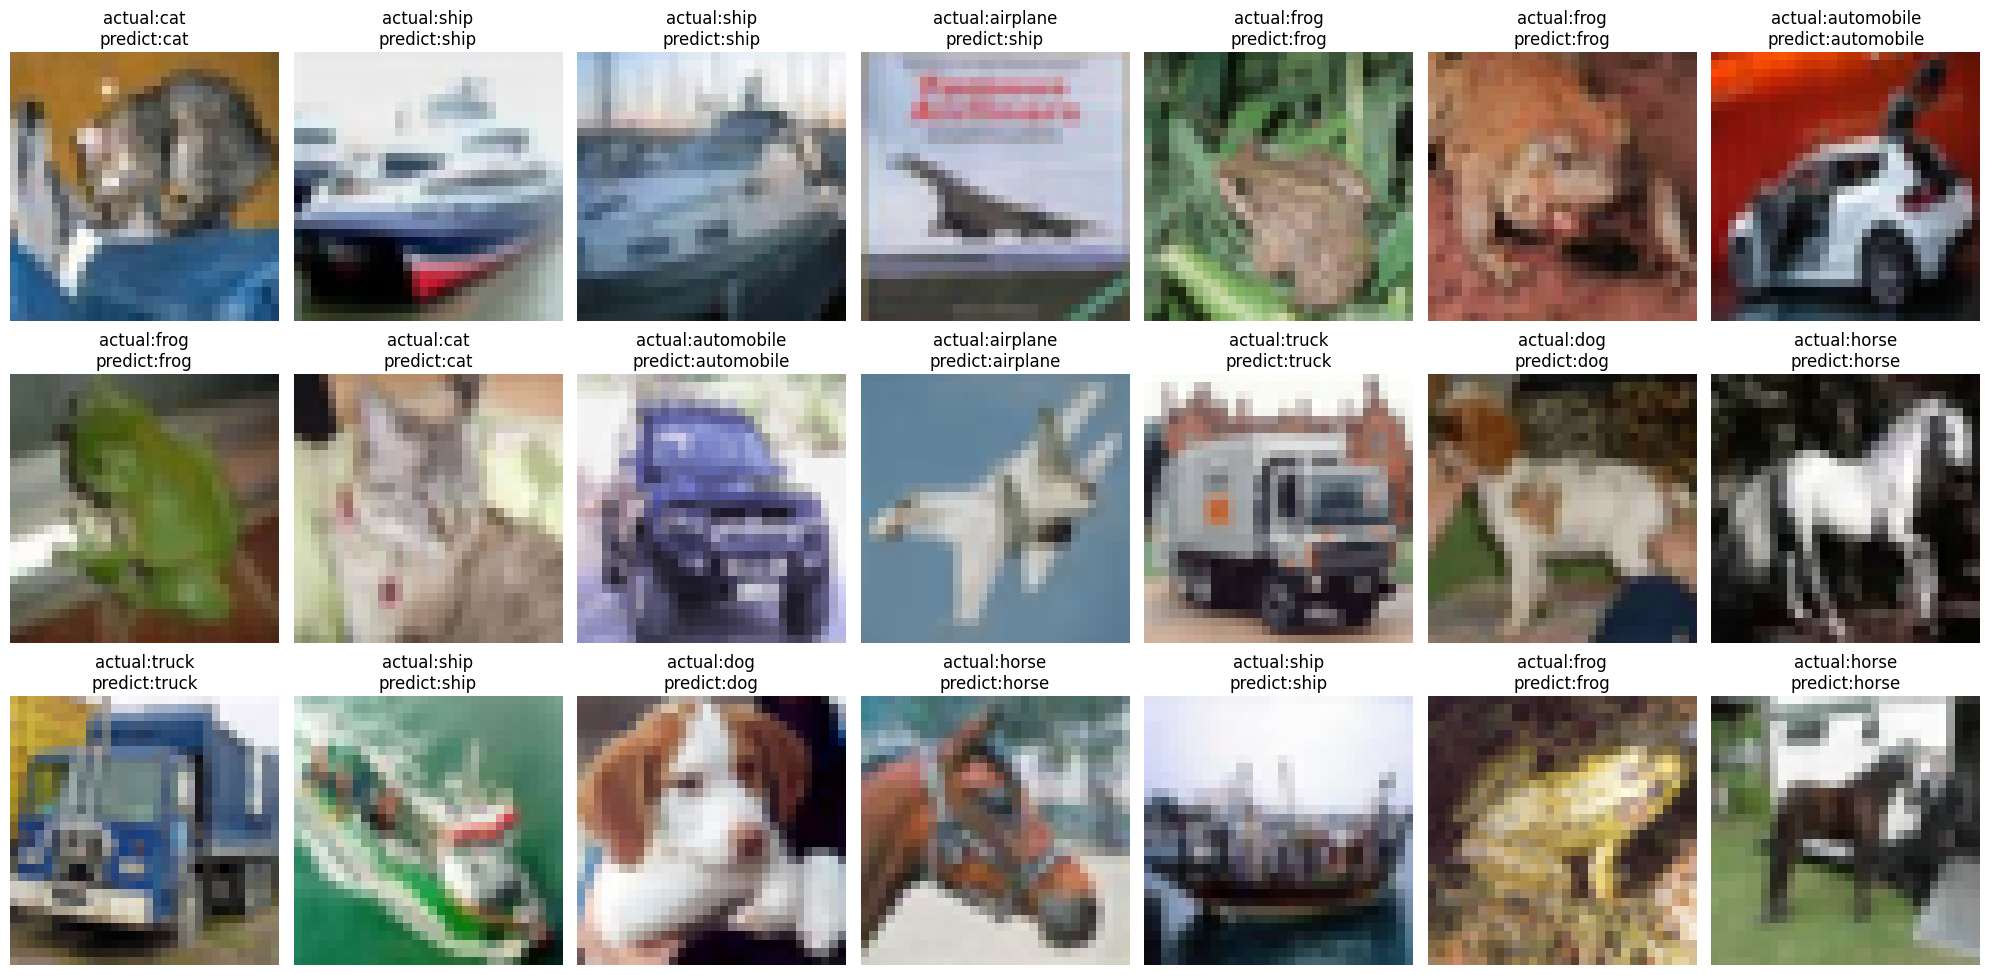

In [ ]:
y_test = y_test.astype('int')
predictions = predictions.astype('int')

# Convert y_test from one-hot encoded back to single labels
y_test_labels = np.argmax(y_test, axis=1)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(20, 10))
index = 0
# Iterate through the axes grid (3 rows, 7 columns)
for i in range(3):
  for j in range(7):
    # Ensure we don't go out of bounds of the test data
    if index < len(x_test):
        # Use y_test_labels for the actual label
        actual_label = labels[y_test_labels[index]]
        predicted_label = labels[predictions[index]]
        axes[i,j].set_title('actual:' + actual_label + '\n' + 'predict:' + predicted_label)
        # Assuming x_test is RGB (shape [height, width, 3]), imshow does not need cmap='gray'
        axes[i,j].imshow(x_test[index])
        axes[i,j].axis('off') # Turn off axes for cleaner image display
        index += 1
    else:
        # If we run out of test images, hide the remaining subplots
        fig.delaxes(axes[i,j])

plt.tight_layout()
plt.show()